In [ ]:
import tensorflow as tf
import os
import kagglehub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [53]:
# Step 1: Import the required library
import kagglehub

# Step 2: Download the latest version of the dataset
path = kagglehub.dataset_download("khoongweihao/covid19-xray-dataset-train-test-sets")

# Step 3: Print the path to the dataset files
print("Path to dataset files:", path)

# Step 4: Now you can proceed to load and preprocess the dataset
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your dataset
dataset_path = path  # The path returned by kagglehub

# Define image parameters
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Create an ImageDataGenerator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of the data for validation
)

# Load the training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Resize images
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Assuming binary classification (COVID vs. Non-COVID)
    subset='training'  # Set as training data
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Assuming binary classification
    subset='validation'  # Set as validation data
)

# Check the number of samples in each set
print(f'Training samples: {train_generator.samples}')
print(f'Validation samples: {validation_generator.samples}')



Path to dataset files: C:\Users\erlan\.cache\kagglehub\datasets\khoongweihao\covid19-xray-dataset-train-test-sets\versions\1
Found 151 images belonging to 1 classes.
Found 37 images belonging to 1 classes.
Training samples: 151
Validation samples: 37


In [54]:
from tensorflow.keras import layers, models

# Create a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Use 'softmax' if you have more than 2 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=10)  # Adjust epochs as necessary



c:\Program Files\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Program Files\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 832ms/step - accuracy: 0.6266 - loss: 0.2988 - val_accuracy: 1.0000 - val_loss: 5.4593e-17
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 671ms/step - accuracy: 1.0000 - loss: 1.9945e-15 - val_accuracy: 1.0000 - val_loss: 1.2240e-31
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 677ms/step - accuracy: 1.0000 - loss: 3.9026e-29 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 592ms/step - accuracy: 1.0000 - loss: 1.8635e-38 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 711ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 633ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 643ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 684ms/step - accuracy: 1.00

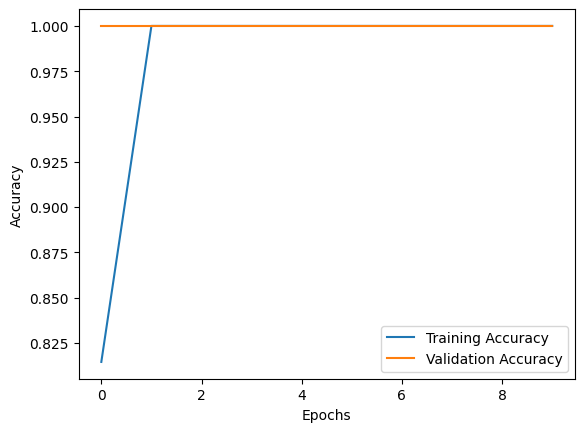

In [55]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [60]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the directories for training and validation
train_dir = os.path.join(path, 'xray_dataset_covid19', 'train')  # Adjust if necessary
test_dir = os.path.join(path, 'xray_dataset_covid19', 'test')    # Use test for evaluation

# Define ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)  # Add any data augmentation if needed
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='binary'  # Use 'categorical' if more than two classes
)

# Load validation data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Check the number of samples
print(f'Training samples: {train_generator.samples}')
print(f'Test samples: {test_generator.samples}')




Found 148 images belonging to 2 classes.


Found 40 images belonging to 2 classes.
Training samples: 148
Test samples: 40


In [61]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set directory paths
dataset_path = "C:\\Users\\erlan\\.cache\\kagglehub\\datasets\\khoongweihao\\covid19-xray-dataset-train-test-sets\\versions\\1\\xray_dataset_covid19"
train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')

# Define image parameters
img_height, img_width = 224, 224  # Change as necessary
batch_size = 32

# Prepare data generators
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # 2 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, 
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=10,  # Change as needed
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5688 - loss: 2.3782 - val_accuracy: 0.4688 - val_loss: 1.0588
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4500 - loss: 1.1146 - val_accuracy: 0.6250 - val_loss: 0.6268
Epoch 3/10


c:\Program Files\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 700ms/step - accuracy: 0.5878 - loss: 0.7392
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.7188 - loss: 0.5833 - val_accuracy: 0.7812 - val_loss: 0.6038
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 830ms/step - accuracy: 0.7531 - loss: 0.6245 - val_accuracy: 1.0000 - val_loss: 0.1228
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8500 - loss: 0.3364  
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8481 - loss: 0.2962 - val_accuracy: 1.0000 - val_loss: 0.0769
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9375 - loss: 0.2504 - val_accuracy: 1.0000 - val_loss: 0.0564
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 861ms/step - accuracy: 0.9709 - loss: 0.1240
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.7812 - loss: 0.3509 - val_accuracy: 1.0000 - val_loss: 0.0861
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 1.0000 - loss: 0.1134
Test accuracy: 100.00%


In [64]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Set paths for training and test datasets
base_dir = "C:\\Users\\erlan\\.cache\\kagglehub\\datasets\\khoongweihao\\covid19-xray-dataset-train-test-sets\\versions\\1\\xray_dataset_covid19"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Load datasets
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),  # Adjust as necessary
    batch_size=32,          # Adjust as necessary
    seed=123
)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),  # Adjust as necessary
    batch_size=32,          # Adjust as necessary
    seed=123
)

# Check number of samples
train_samples = tf.data.experimental.cardinality(train_dataset).numpy()
test_samples = tf.data.experimental.cardinality(test_dataset).numpy()

print(f"Training samples: {train_samples}")
print(f"Test samples: {test_samples}")

# Now you can proceed to define and compile your model and train it
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # Assuming 2 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=test_dataset, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc * 100:.2f}%")



Found 148 files belonging to 2 classes.
Found 40 files belonging to 2 classes.
Training samples: 5
Test samples: 2
Epoch 1/10


c:\Program Files\Python310\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 593ms/step - accuracy: 0.5770 - loss: 3.7631 - val_accuracy: 0.5000 - val_loss: 0.6769
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 590ms/step - accuracy: 0.5790 - loss: 0.6703 - val_accuracy: 0.9750 - val_loss: 0.5877
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 550ms/step - accuracy: 0.8067 - loss: 0.5804 - val_accuracy: 0.6000 - val_loss: 0.4972
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 537ms/step - accuracy: 0.7368 - loss: 0.5006 - val_accuracy: 1.0000 - val_loss: 0.1638
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 575ms/step - accuracy: 0.9203 - loss: 0.2392 - val_accuracy: 0.9750 - val_loss: 0.1008
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 573ms/step - accuracy: 0.9133 - loss: 0.2069 - val_accuracy: 1.0000 - val_loss: 0.0193
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 553ms/step - accuracy: 0.9833 - loss: 0.0748 - val_accuracy: 1.0000 - val_loss: 0.0179
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 594ms/step - accuracy: 0.9833 - loss: 0.0399 - val_accuracy: 1.0000 - val_loss: 0.0216
Epo

Found 148 files belonging to 2 classes.
Found 40 files belonging to 2 classes.
Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step - accuracy: 0.5016 - loss: 7122.7549 - val_accuracy: 0.3000 - val_loss: 877.3206
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 348ms/step - accuracy: 0.5526 - loss: 354.4664 - val_accuracy: 0.3000 - val_loss: 74.0393
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 328ms/step - accuracy: 0.5401 - loss: 36.6605 - val_accuracy: 0.7333 - val_loss: 0.6838
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step - accuracy: 0.4992 - loss: 0.6745 - val_accuracy: 0.7000 - val_loss: 0.6917
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step - accuracy: 0.4534 - loss: 0.6938 - val_accuracy: 0.7000 - val_loss: 0.6913
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 394ms/step - accuracy: 0.4502 - loss: 6305.6338 - val_accuracy: 0.5333 - val_loss: 1187.6205
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 318ms/step - accuracy: 0.4685 - loss: 1478.3348 - val_accuracy: 0.5333 - val_lo

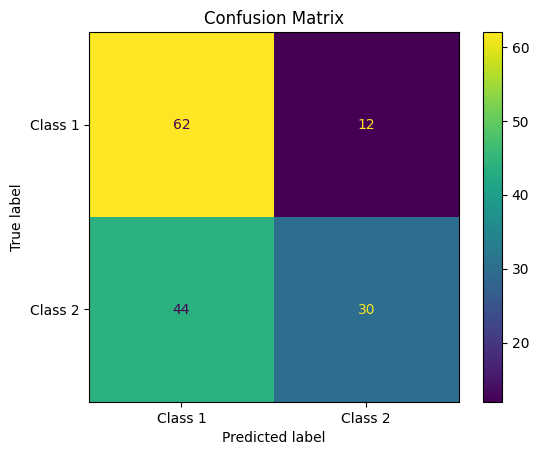

In [66]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set dataset paths
train_dir = "xray_dataset_covid19/train"  # Adjust to your training data path
test_dir = "xray_dataset_covid19/test"  # Adjust to your test data path

# Load datasets
train_dataset = image_dataset_from_directory(train_dir, image_size=(224, 224), batch_size=32, seed=123)
test_dataset = image_dataset_from_directory(test_dir, image_size=(224, 224), batch_size=32, seed=123)

# Prepare data
X_train = []  # Features
y_train = []  # Labels

# Extract images and labels from train_dataset
for images, labels in train_dataset:
    X_train.extend(images.numpy())
    y_train.extend(labels.numpy())

X_train = np.array(X_train)
y_train = np.array(y_train)

# K-Fold Cross Validation
kf = KFold(n_splits=5)
all_preds = []
all_true = []

for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

    # Define your model architecture here (this is a placeholder)
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(224, 224, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')  # Change to number of classes
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_fold_train, y_fold_train, epochs=5, validation_data=(X_fold_val, y_fold_val))

    # Predict on the validation set
    preds = model.predict(X_fold_val)
    all_preds.extend(np.argmax(preds, axis=1))
    all_true.extend(y_fold_val)

# Generate the confusion matrix
cm = confusion_matrix(all_true, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 1", "Class 2"])  # Change labels as needed
disp.plot()
plt.title('Confusion Matrix')
plt.show()


Found 148 files belonging to 2 classes.
Found 40 files belonging to 2 classes.
Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 515ms/step - accuracy: 0.4536 - loss: 1967.0686 - val_accuracy: 0.3000 - val_loss: 423.0205
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 495ms/step - accuracy: 0.5735 - loss: 199.2988 - val_accuracy: 0.7000 - val_loss: 45.1680
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 484ms/step - accuracy: 0.6022 - loss: 36.5600 - val_accuracy: 0.7333 - val_loss: 11.8759
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 482ms/step - accuracy: 0.8663 - loss: 9.2949 - val_accuracy: 0.9667 - val_loss: 1.2845
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 479ms/step - accuracy: 0.9508 - loss: 0.8445 - val_accuracy: 0.7000 - val_loss: 7.5880
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 621ms/step - accuracy: 0.4867 - loss: 1910.4158 - val_accuracy: 0.4667 - val_loss: 848.6505
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 477ms/step - accuracy: 0.5273 - loss: 645.2463 - val_accuracy: 0.8667 - val_los

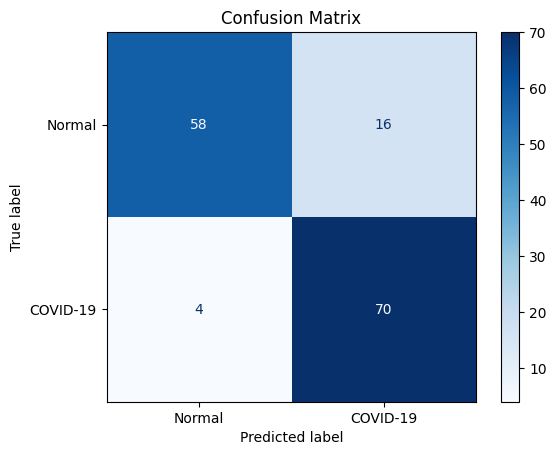

Overall accuracy across all folds: 0.86


In [67]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set dataset paths
train_dir = "C:\\Users\\erlan\\.cache\\kagglehub\\datasets\\khoongweihao\\covid19-xray-dataset-train-test-sets\\versions\\1\\xray_dataset_covid19\\train"  # Adjust to your training data path
test_dir = "C:\\Users\\erlan\\.cache\\kagglehub\\datasets\\khoongweihao\\covid19-xray-dataset-train-test-sets\\versions\\1\\xray_dataset_covid19\\test"  # Adjust to your test data path

# Load datasets
train_dataset = image_dataset_from_directory(train_dir, image_size=(224, 224), batch_size=32, seed=123)
test_dataset = image_dataset_from_directory(test_dir, image_size=(224, 224), batch_size=32, seed=123)

# Prepare data
X_train = []  # Features
y_train = []  # Labels

# Extract images and labels from train_dataset
for images, labels in train_dataset:
    X_train.extend(images.numpy())
    y_train.extend(labels.numpy())

X_train = np.array(X_train)
y_train = np.array(y_train)

# K-Fold Cross Validation
kf = KFold(n_splits=5)
all_preds = []
all_true = []

for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]

    # Define your model architecture
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(224, 224, 3)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')  # Change to number of classes
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_fold_train, y_fold_train, epochs=5, validation_data=(X_fold_val, y_fold_val))

    # Predict on the validation set
    preds = model.predict(X_fold_val)
    all_preds.extend(np.argmax(preds, axis=1))
    all_true.extend(y_fold_val)

# Generate the confusion matrix
cm = confusion_matrix(all_true, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "COVID-19"])  # Adjust class names if necessary
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Display accuracy
accuracy = np.sum(np.array(all_preds) == np.array(all_true)) / len(all_true)
print(f'Overall accuracy across all folds: {accuracy:.2f}')


In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assume test_dataset is defined and is in the format (image, label)
y_true = []
y_pred = []

# Iterate through the test dataset
for images, labels in test_dataset:
    preds = model.predict(images)  # Get predictions
    y_pred.extend((preds > 0.5).astype("int32").flatten())  # Convert probabilities to classes
    y_true.extend(labels.numpy().flatten())  # Store true labels

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Print the lengths of true and predicted labels for debugging
print(f"Length of y_true: {len(y_true)}")
print(f"Length of y_pred: {len(y_pred)}")

# Calculate evaluation metrics if lengths match
if len(y_true) == len(y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Print evaluation metrics
    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
else:
    print("Mismatch in number of samples between true and predicted labels.")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Length of y_true: 40
Length of y_pred: 80
Mismatch in number of samples between true and predicted labels.
